In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Qin Cirrhosis

## Refseq OTU

In [2]:
task = 'Qin Cirrhosis Healthy/Cirrhosis Refseq OTU'
folder = 'qin-cirrhosis'

In [3]:
num_features = 588
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/BO9V1G_qin2014_20210224_19_41_12/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/4SJPO5_qin2014_20210225_09_33_04/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/DU2P08_qin2014_20210225_09_32_36/best_test.csv', sep=';') # NoRel+CLR

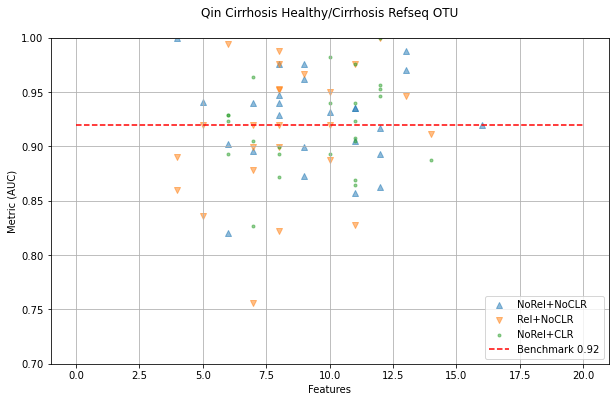

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.92, filename='./plots/qin_cirrhosis_refseq_otu.png', xmax=20, ylim=(0.7, 1))

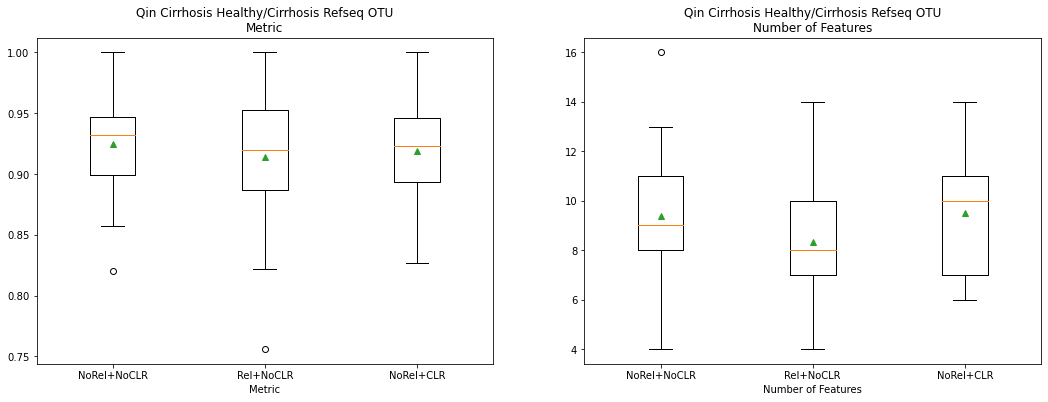

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plots/qin_cirrhosis_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (130, 8485)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (130, 8485)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (130, 8485)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
4,3,4,1.000,1.000,"[161, 3672, 5475, 8326]",0.993,0.993,"[1.0, 0.953, 0.938, 0.911, 0.973, 0.935, 0.982...",0.959,0.834,1.0,0.038
20,15,5,0.941,0.940,"[901, 1352, 3390, 3650, 5475]",0.932,0.932,"[0.994, 0.97, 1.0, 0.967, 0.864, 0.89, 0.92, 0...",0.959,0.864,1.0,0.037
19,14,8,0.976,0.975,"[754, 1680, 3070, 3487, 3672, 4864, 5599, 7714]",0.962,0.962,"[0.964, 0.953, 0.938, 0.914, 0.938, 0.967, 0.9...",0.944,0.840,1.0,0.035
6,5,7,0.940,0.939,"[485, 1785, 3650, 4826, 6108, 6650, 7647]",0.928,0.928,"[0.976, 0.917, 0.926, 0.973, 0.917, 0.976, 0.9...",0.944,0.731,1.0,0.044
23,16,6,0.902,0.901,"[1802, 3672, 4147, 4902, 5475, 6664]",0.892,0.892,"[1.0, 0.899, 0.932, 0.92, 0.92, 0.941, 0.958, ...",0.944,0.815,1.0,0.038


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
0,0,9,0.967,0.966,"[596, 1538, 3672, 4056, 4954, 5099, 5401, 7166...",0.952,0.952,"[0.955, 1.0, 0.982, 0.949, 0.988, 0.967, 0.944...",0.948,0.796,1.0,0.037
12,8,10,0.920,0.919,"[118, 684, 1520, 1680, 1684, 2019, 2761, 3550,...",0.903,0.903,"[0.932, 0.982, 0.876, 0.976, 0.923, 0.964, 0.9...",0.944,0.834,1.0,0.039
20,11,7,0.899,0.898,"[301, 1387, 2143, 3672, 5719, 7224, 7678]",0.887,0.887,"[0.881, 0.923, 0.994, 0.988, 0.885, 0.964, 0.8...",0.943,0.811,1.0,0.043
26,14,11,0.976,0.975,"[235, 1661, 2265, 2335, 2619, 3303, 3563, 5357...",0.957,0.957,"[0.964, 0.923, 0.882, 0.97, 1.0, 1.0, 0.97, 0....",0.940,0.751,1.0,0.049
2,2,8,0.988,0.987,"[908, 1658, 2046, 2606, 3672, 4955, 5344, 6783]",0.974,0.974,"[0.962, 0.929, 0.994, 0.958, 0.961, 0.92, 0.98...",0.938,0.693,1.0,0.043


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
4,2,11,0.864,0.863,"[581, 595, 1984, 2333, 3384, 3393, 3563, 5475,...",0.845,0.845,"[0.982, 0.982, 1.0, 1.0, 0.953, 0.982, 0.964, ...",0.953,0.798,1.0,0.045
10,4,6,0.893,0.892,"[485, 1672, 3563, 4362, 4502, 7819]",0.883,0.883,"[1.0, 0.97, 0.896, 0.947, 0.905, 0.976, 0.944,...",0.950,0.830,1.0,0.041
20,11,10,0.982,0.981,"[437, 530, 1664, 3563, 4585, 4896, 4945, 5475,...",0.965,0.965,"[0.882, 0.946, 0.953, 0.917, 0.958, 0.988, 0.8...",0.947,0.817,1.0,0.041
16,8,7,0.964,0.963,"[238, 1679, 3650, 4215, 4367, 5630, 5765]",0.952,0.952,"[0.828, 0.896, 0.882, 0.878, 0.952, 0.976, 0.8...",0.944,0.801,1.0,0.039
35,22,7,0.905,0.904,"[303, 1262, 1676, 3563, 6380, 7932, 8401]",0.893,0.893,"[0.964, 0.896, 0.95, 0.967, 0.994, 0.97, 0.943...",0.943,0.769,1.0,0.045


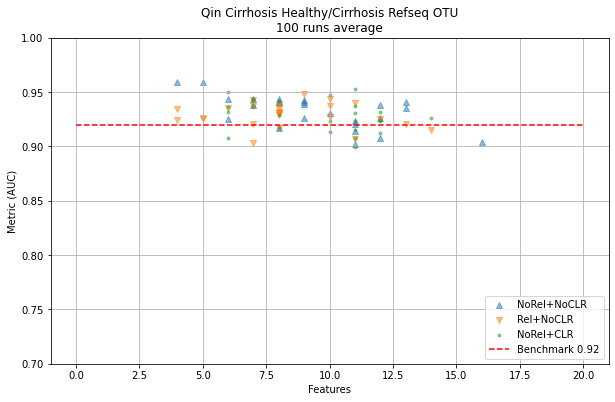

In [30]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.92, filename='./plots/qin_cirrhosis_refseq_otu_avg_n.png', xmax=20, ylim=(0.7, 1))

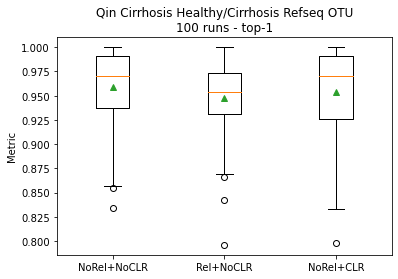

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plots/qin_cirrhosis_boxplot_nruns_top1_refseq_otu.png')

---

In [18]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [19]:
folder = 'qin-cirrhosis'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [20]:
config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    res = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    res = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(res), 3))

config.DATA_PARAMS['task'] = cirrhosis['qin_healthy_cirrhosis_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    res = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(res), 3))

Final dataset shape: (130, 8485)
Final dataset shape: (130, 8485)
Final dataset shape: (130, 8485)


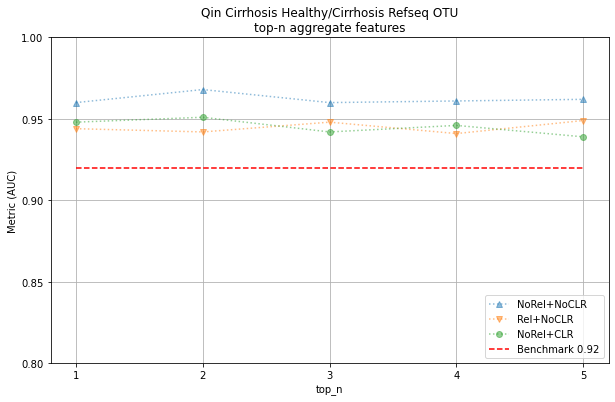

In [21]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.92, filename='./plots/qin_cirrhosis_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.8, 1.0001), top_n=top_n)

In [22]:
best_n

{'NoRel+NoCLR': [0.96, 0.968, 0.96, 0.961, 0.962],
 'Rel+NoCLR': [0.944, 0.942, 0.948, 0.941, 0.949],
 'NoRel+CLR': [0.948, 0.951, 0.942, 0.946, 0.939]}

---

In [23]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [31]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
_ = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0063       NC_022246.1 Streptococcus intermedius B196, complete genome
          -            0.0213       NZ_CP012384.1 Enterococcus durans strain KLDS 6.0930, complete genome
          -            0.0423       NZ_KQ033916.1 Parabacteroides goldsteinii DSM 19448 = WAL 12034 genomic scaffold aczIT-supercont1.5, whole genome shotgun sequence
          -            0.0928       NZ_GG692782.1 Roseburia intestinalis L1-82 genomic scaffold Scfld69, whole genome shotgun sequence
          -            0.1186       NC_006529.1 Lactobacillus salivarius UCC118 plasmid pSF118-20, complete sequence
          -            0.1302       NZ_KB905466.1 Bacteroides salyersiae WAL 10018 = DSM 18765 = JCM 12988 genomic scaffold acAqE-supercont1.1, whole genome shotgun sequence
          -            0.2827       NZ_GL538184.1 Megasphaera micronuciformis F0359 Scfld14, whole genome shotgun sequence
          -            0.3058       N

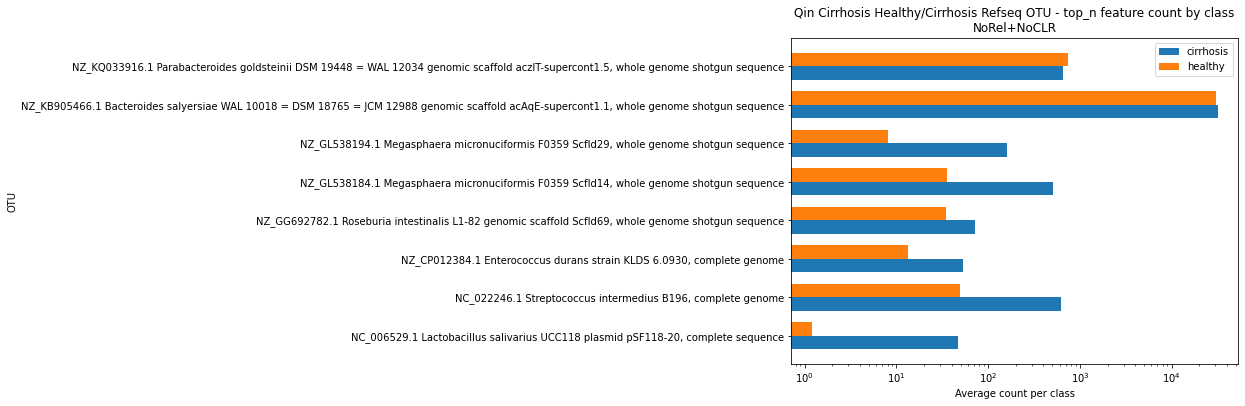

In [32]:
features = data1.features[top_n_features]
filename = f'./plots/qin_cirrhosis_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('cirrhosis', 'healthy'), figsize=(8,6), filename=filename, clean_otu=True)

In [33]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0019       NZ_CP013195.1 Prevotella enoeca strain F0113, complete genome
          -            0.0022       NC_005856.1 Enterobacteria phage P1, complete genome
          -            0.0034       NZ_GG667608.1 Clostridium hathewayi DSM 13479 genomic scaffold Scfld1, whole genome shotgun sequence
          -            0.0039       NZ_GG668538.1 Oribacterium sinus F0268 genomic scaffold SCAFFOLD6, whole genome shotgun sequence
          -            0.0048       NC_022567.1 Adlercreutzia equolifaciens DSM 19450 DNA, complete genome
          -            0.0061       NC_012780.1 Eubacterium eligens ATCC 27750 plasmid, complete sequence
          -            0.0062       NZ_DS480322.1 Clostridium sp. L2-50 Scfld_02_11, whole genome shotgun sequence
          -            0.0067       NZ_GG667622.1 Clostridium hathewayi DSM 13479 genomic scaffold Scfld15, whole genome shotgun sequence
          -            0.0075   

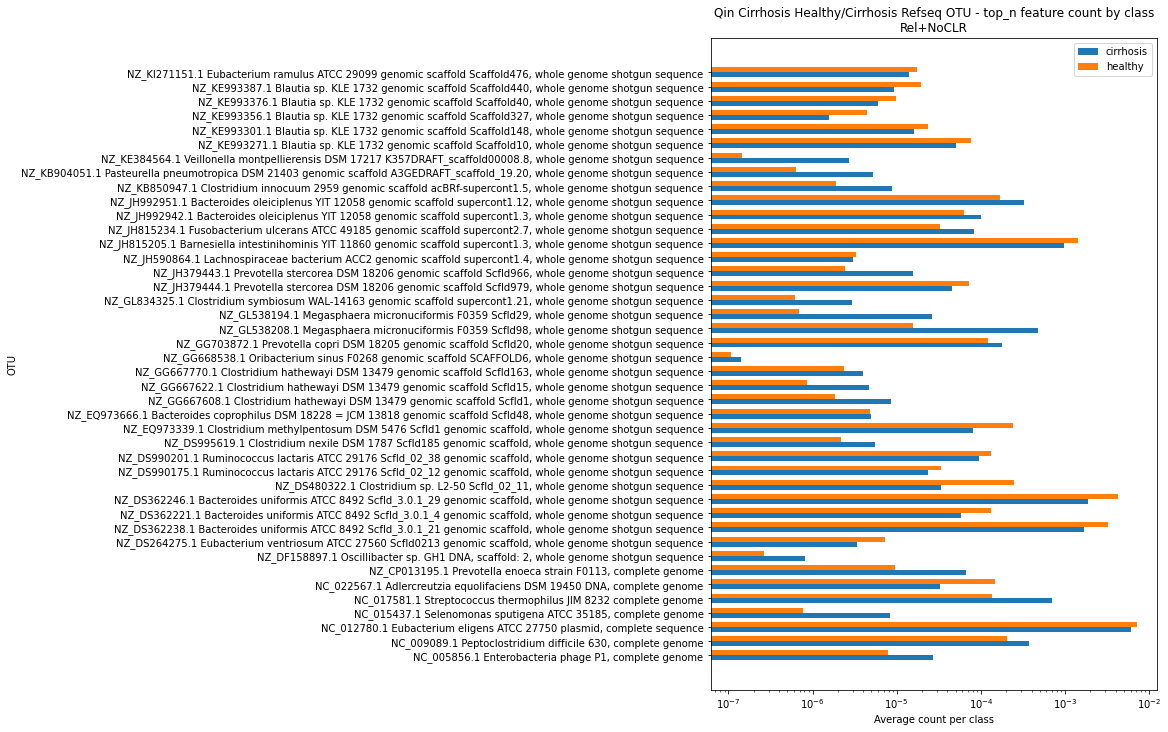

In [34]:
features = data2.features[top_n_features]
filename = f'./plots/qin_cirrhosis_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('cirrhosis', 'healthy'), figsize=(8,12), filename=filename, clean_otu=True)

In [35]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

_ = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.005        NZ_GG694015.1 Granulicatella adiacens ATCC 49175 genomic scaffold SCAFFOLD1, whole genome shotgun sequence
          -            0.0062       NZ_DS981505.1 Bacteroides coprocola DSM 17136 Scfld_02_78 genomic scaffold, whole genome shotgun sequence
          -            0.0127       NZ_HE578926.1 Clostridiaceae bacterium JC13 genomic scaffold, scaffold00004, whole genome shotgun sequence
          -            0.0178       NZ_GG692775.1 Roseburia intestinalis L1-82 genomic scaffold Scfld62, whole genome shotgun sequence
          -            0.029        NZ_GL982464.1 Prevotella nigrescens ATCC 33563 genomic scaffold SCAFFOLD1, whole genome shotgun sequence
          -            0.0425       NC_014106.1 Lactobacillus crispatus ST1 complete genome, strain ST1
          -            0.043        NZ_DS362234.1 Bacteroides uniformis ATCC 8492 Scfld_3.0.1_17 genomic scaffold, whole genome shotgun sequence
  

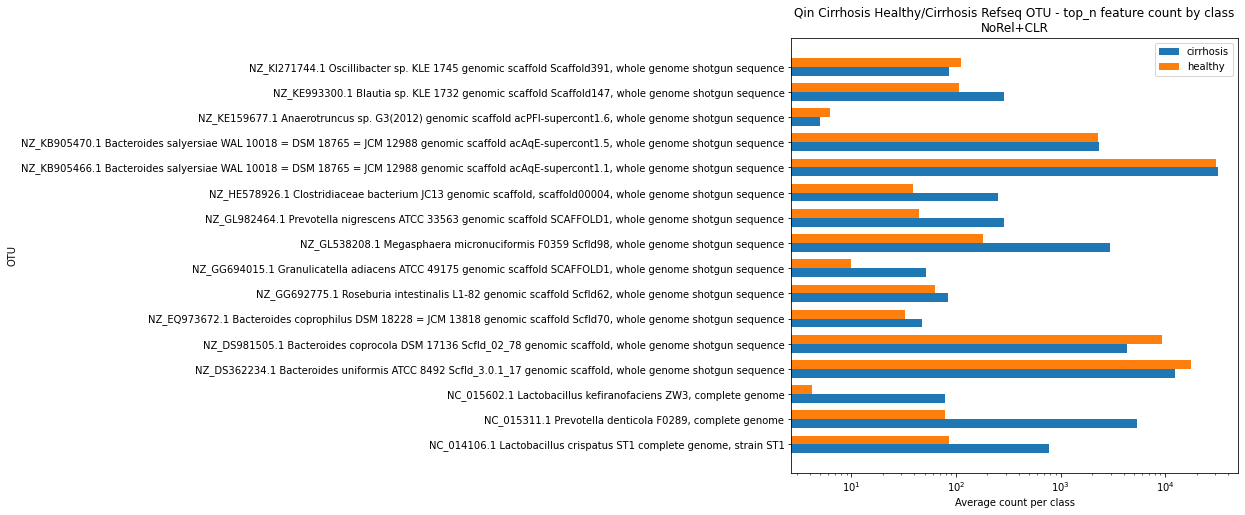

In [37]:
features = data3.features[top_n_features]
filename = f'./plots/qin_cirrhosis_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, features, title=task+' - top_n feature count by class', subtitle=experiment, classes=('cirrhosis', 'healthy'), figsize=(8,8), filename=filename, clean_otu=True)